# Gradient Descent

In the most general case, Gradient Descent is an optimization method. 

Let's say we have a few $(x,y)$ data points which represent heights and weights. And we want to predict height $y$, given a weight $x$.

We can model it by a line using linear regression method. 

Let's use scikit learn to resolve it


x = [5.2 8.2 1. ], y = [16.3 21.8  7.3]


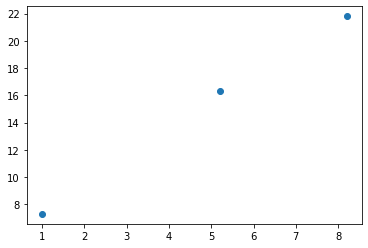

In [6]:
# for simplicity, we use 3 data points

import numpy as np
import matplotlib as mpl 

import matplotlib.pyplot as plt 
rng = np.random.RandomState(1)
x_data = np.round(10 * rng.rand(3), 1) + 1
y_data = np.round(2 * x + 5 + 3 * rng.rand(3), 1)
plt.scatter(x_data,y_data)
print(f"x = {x_data}, y = {y_data}")

## Using Linear Regression

model slope = 2.02217125382263
model intercept = 5.426911314984709


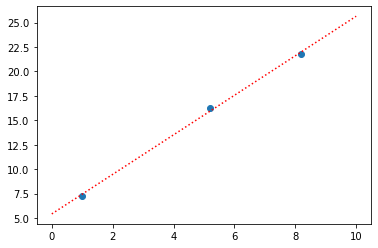

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x_data[:, np.newaxis], y_data)

xfit = np.linspace(0, 10, 50)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x_data,y_data)
plt.plot(xfit, yfit, ':r')

print(f"model slope = {model.coef_[0]}")
print(f"model intercept = {model.intercept_}")




## Graident Descent Method

We have two parameters we want to estimate or optimize, intercept and slope.
First, we need to define a **Loss function**, for example, the sum of squared residuls: $$\sum (\text{predicted} - \text{observed})^2$$


1. Take derivative of the **Loss function** for each parameter in it; that derivative, when having 2 or more, is also known as Graident of the Loss function.
2. Pick random value for the parameters
3. Plug the values into slope/derivatives or graident
4. Calculate step size: $$\text{step size} = \text{slope} * \text{learning rate}$$
5. Calculate new parameters: $$\text{new parameter} = \text{old parameter} - \text{step size}$$

We repeat 3, 4, 5 until (1) step size is very small or (2) reach the limit of number of steps.


Let's use code to implement this process



### Loss function

Let's rewrite the function:

$$y = a x + b $$

we want to estimate $a$ (slope) and $b$ (intercept). 
Let's write out the Loss function and its derivatives using the chain rule:

<img src="../figs/gd-linear_ab.png" width=500px>

Now we can implement these gradient using the following plain Python code.
Note that we assume `X` and `Y` holds the 3 sample data. We use small letter `x` and `y` as a single element data point. It is actually $\hat{x}$ and $\hat{y}$ in the above formula.

A better notation will be:

$$ \text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$

Note: in the following calculation, we just use the sum of error, not the mean sum errors (MSE).


In [15]:
a = 0
b = 0

def dL_da(x, y):
    ''' partial derivative of dL/da '''
    return 2 * (y-(a*x+b)) * (-x) 

def dL_db(x, y):
    return 2 * (y-(a*x+b)) * (-1)

def loss(x,y):
    y_pred = x+a + b 
    return (y_pred-y)*(y_pred-y)

def d_sum_d_a(X, Y):
    da = 0
    for x, y in zip(X, Y):
        da += dL_da(x,y)
    return da 

def d_sum_d_b(X,Y):
    db = 0
    for x, y in zip(X, Y):
        db += dL_db(x,y)
    return db 

# one at time
# but the result is not as good as FULL 
# for epoch in range(1000):
#     for x, y in zip(x_data, y_data):
#         a = a - dL_da(x,y) * 0.01
#         b = b - dL_db(x,y) * 0.01
#          #print("epoch = {epoch}, Loss = {loss(x,y)}")

for epoch in range(1000):
    a = a - d_sum_d_a(x_data, y_data) * 0.01
    b = b - d_sum_d_b(x_data, y_data) * 0.01

print(f"slope = {a}")
print(f"intercept = {b}")


slope = 2.0221712918213104
intercept = 5.426911065779949


After 1000 iterations, we need that the slope and intercept is pretty close to what linear regression is getting.

The key point:

* We use **Gradient** to **descent** to the lowest point of the **Loss function**, which is, in this case the sum of squared residuals. Thus, this algorithm is known as "Gradient Descent".

* The other thing to note is that, when we calculate gradient: `d_sum_d_a` and `d_sum_d_b`, we use all three data points, or samples in the calulation. This is known as **Full Gradient Descent**. When you have lots of data points, this may not be feasible, you have to chunk it in batches, that give birth to the **Stochastic Gradient Dscent**.


* when loss is big, the step size is also big, that means we learn fast. As we approach the optimal point, step size is small, as we want to be careful not to miss the optimal point.


* without using gradient descent, you can do a exhausive search around say for a = (0, 4, 0.1), b = (0, 10), and calulate MSE for each combination. Most of the tutorial will just use one estimate parameter, say just $a$ by itself. This way, search will be on one interval, and you will observe an familar quadratic with a minimum point. With two parameters, it is a 3D parabolic.


* what is training? with respect to loss function, it is:

$$\arg \min_{w} \text{Loss}(w) $$
